In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from chainscope.typing import *
from chainscope.utils import (
    CLOSED_SOURCE_MODELS,
    MODELS_MAP,
    get_model_display_name,
    sort_models,
)

orig_df = pd.read_pickle(DATA_DIR / "df-wm.pkl")
# orig_df = orig_df[orig_df.instr_id == "instr-v0"]
orig_df = orig_df[orig_df.model_id == "openai/gpt-4o"]
# orig_df = orig_df[orig_df.prop_id == "wm-art-release"]
orig_df = orig_df[orig_df.unknown_rate < 0.5]
orig_df

,q_str,qid,prop_id,comparison,answer,dataset_id,model_id,p_yes,p_no,p_correct,mode,instr_id,x_name,y_name,x_value,y_value,temperature,top_p,max_new_tokens,unknown_rate
0,about world structures:\n\nIs Wairakei Power S...,01ec67da7f1e0a19db1d2379ad424839e679bd46ac6b6d...,wm-world-place-structure-lat,lt,NO,wm-world-place-structure-lat_lt_NO_1_2d7f6646,openai/gpt-4o,0.000000,1.000000,1.000000,cot,instr-wm,Wairakei Power Station,Great Ocean Road,-38.6269,-38.7338,0.7,0.9,2000,0.0
1,about world structures:\n\nIs Parliament House...,096fa02462e989d5dc0fac2d5f2d0cb459ff3459e1a4e9...,wm-world-place-structure-lat,lt,NO,wm-world-place-structure-lat_lt_NO_1_2d7f6646,openai/gpt-4o,0.000000,1.000000,1.000000,cot,instr-wm,"Parliament House, Hobart","Shot Tower, Taroona",-42.8854,-42.9580,0.7,0.9,2000,0.0
2,about world structures:\n\nIs Christ Church Ca...,0d042084a031a7b8dbe3a872e34f91c6b48167a7fb33a6...,wm-world-place-structure-lat,lt,NO,wm-world-place-structure-lat_lt_NO_1_2d7f6646,openai/gpt-4o,1.000000,0.000000,0.000000,cot,instr-wm,Christ Church Cathedral (Falkland Islands),Machu Picchu Base,-51.6922,-62.0915,0.7,0.9,2000,0.0
3,"about world structures:\n\nIs Shot Tower, Taro...",1749de77b1980a0f8bfd3707fc13ed505702ea0c67d1dc...,wm-world-place-structure-lat,lt,NO,wm-world-place-structure-lat_lt_NO_1_2d7f6646,openai/gpt-4o,0.400000,0.600000,0.600000,cot,instr-wm,"Shot Tower, Taroona",CTV Building,-42.9580,-43.5328,0.7,0.9,2000,0.0
4,about world structures:\n\nIs New Plymouth Pow...,1f528f50c82a67759b7653dcd7343641a489d7e0059ff2...,wm-world-place-structure-lat,lt,NO,wm-world-place-structure-lat_lt_NO_1_2d7f6646,openai/gpt-4o,0.000000,1.000000,1.000000,cot,instr-wm,New Plymouth Power Station,Chateau Tongariro,-39.0578,-39.2000,0.7,0.9,2000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,about world places:\n\nDoes Roque del Oeste ha...,e23de7b391209e4e09780db19b66ce4a2d00fd4259926d...,wm-world-place-populated-place-total-area,lt,NO,wm-world-place-populated-place-total-area_lt_N...,openai/gpt-4o,0.600000,0.400000,0.400000,cot,instr-wm,Roque del Oeste,Flagler Monument Island,20000.0000,18129.9000,0.7,0.9,2000,0.0
1567,about world places:\n\nDoes Rockall have small...,e2cb0de6e6ae88ec7feb27d62f063c1a2ecd139ca58256...,wm-world-place-populated-place-total-area,lt,NO,wm-world-place-populated-place-total-area_lt_N...,openai/gpt-4o,0.200000,0.800000,0.800000,cot,instr-wm,Rockall,Busta Rhymes Island,784.3000,149.0000,0.7,0.9,2000,0.0
1570,about world places:\n\nDoes Santa Cruz del Isl...,f22c638bb31a4fefb5603b1b064330b1060e4ad822a3e2...,wm-world-place-populated-place-total-area,lt,NO,wm-world-place-populated-place-total-area_lt_N...,openai/gpt-4o,1.000000,0.000000,0.000000,cot,instr-wm,Santa Cruz del Islote,Cayo Espanto,12140.6000,12000.0000,0.7,0.9,2000,0.0
1572,about world places:\n\nDoes Zhongsha Islands h...,f86ca347b4ffb021331dbd13928b019bf6e1ca582995c5...,wm-world-place-populated-place-total-area,lt,NO,wm-world-place-populated-place-total-area_lt_N...,openai/gpt-4o,0.666667,0.333333,0.333333,cot,instr-wm,Zhongsha Islands,Bengtskär,3.0000,0.0000,0.7,0.9,2000,0.4


In [2]:
sort_models(orig_df["prop_id"].unique().tolist())

['wm-world-place-structure-lat',
 'wm-world-place-natural-place-long',
 'wm-world-place-natural-place-lat',
 'wm-world-place-populated-place-lat',
 'wm-nyt-pubdate-2013-page3',
 'wm-world-place-populated-place-population',
 'wm-world-place-structure-long',
 'wm-world-place-populated-place-long',
 'wm-world-place-populated-place-total-area',
 'wm-world-place-natural-place-total-area']

In [3]:
orig_df[(orig_df.prop_id == "wm-nyt-pubdate-2013-page3") & (orig_df.comparison == "lt")]

,q_str,qid,prop_id,comparison,answer,dataset_id,model_id,p_yes,p_no,p_correct,mode,instr_id,x_name,y_name,x_value,y_value,temperature,top_p,max_new_tokens,unknown_rate
155,"Was ""2 Diplomats Met Uneven Fates in Benghazi ...",00eb23801e384aebe040fb00c4b757012b1d90b9b0f04c...,wm-nyt-pubdate-2013-page3,lt,NO,wm-nyt-pubdate-2013-page3_lt_NO_1_7a170578,openai/gpt-4o,1.000000,0.000000,0.000000,cot,instr-nyt,2 Diplomats Met Uneven Fates in Benghazi Uproar.,Genocide Trial of Guatemalan Ex-Dictator May H...,20130530.0,20130522.0,0.7,0.9,2000,0.0
156,"Was ""Russia Evacuates Embassy in Libya After A...",01610b14cbaaf65894765ca054df39b4e5a482d5fb63ef...,wm-nyt-pubdate-2013-page3,lt,NO,wm-nyt-pubdate-2013-page3_lt_NO_1_7a170578,openai/gpt-4o,1.000000,0.000000,0.000000,cot,instr-nyt,Russia Evacuates Embassy in Libya After Attack.,Northern Spy Lifts Cloak on Koreas’ Deadly Riv...,20131003.0,20131002.0,0.7,0.9,2000,0.0
158,"Was ""Genocide Trial of Guatemalan Ex-Dictator ...",06db0fc661ebe7f131d4e215f1a93c5210e7ccd2679689...,wm-nyt-pubdate-2013-page3,lt,NO,wm-nyt-pubdate-2013-page3_lt_NO_1_7a170578,openai/gpt-4o,0.750000,0.250000,0.250000,cot,instr-nyt,Genocide Trial of Guatemalan Ex-Dictator May H...,"Chinese Official Arrives in India, Hoping to F...",20130522.0,20130520.0,0.7,0.9,2000,0.2
159,"Was ""Malaysian Incursion by Filipinos Ends in ...",090cfa75f3397e9c9bca0f2ea7d118f847fd3b3030fda8...,wm-nyt-pubdate-2013-page3,lt,NO,wm-nyt-pubdate-2013-page3_lt_NO_1_7a170578,openai/gpt-4o,0.888889,0.111111,0.111111,cot,instr-nyt,Malaysian Incursion by Filipinos Ends in a Dea...,North Koreans Blame U.S. for Fueling ‘Explosiv...,20130301.0,20130228.0,0.7,0.9,2000,0.1
160,"Was ""In Obama’s Praise of Mandela, a Nudge to ...",0f28ee41c0ac1f4bccbc2fd968f45f86456e0fa107778f...,wm-nyt-pubdate-2013-page3,lt,NO,wm-nyt-pubdate-2013-page3_lt_NO_1_7a170578,openai/gpt-4o,0.800000,0.200000,0.200000,cot,instr-nyt,"In Obama’s Praise of Mandela, a Nudge to Africa.",A Global Dining Empire Loses an Outpost.,20131213.0,20131209.0,0.7,0.9,2000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,"Was ""After U.N. Vote on Sanctions, 2 Koreas Ra...",f51e6b08571d478dee06e46e13780d1ff97d26144a560d...,wm-nyt-pubdate-2013-page3,lt,YES,wm-nyt-pubdate-2013-page3_lt_YES_1_ec9489ac,openai/gpt-4o,1.000000,0.000000,1.000000,cot,instr-nyt,"After U.N. Vote on Sanctions, 2 Koreas Ratchet...",Harvard Search of E-Mail Stuns Its Faculty Mem...,20130308.0,20130311.0,0.7,0.9,2000,0.0
698,"Was ""Seven Die in Iran After Drinking Homemade...",f5691cf7852423182b8a65f1f77b18d702d7c4e0f9f3e2...,wm-nyt-pubdate-2013-page3,lt,YES,wm-nyt-pubdate-2013-page3_lt_YES_1_ec9489ac,openai/gpt-4o,0.500000,0.500000,0.500000,cot,instr-nyt,Seven Die in Iran After Drinking Homemade Alco...,Former Hacker Testifies at Private’s Court-Ma...,20130603.0,20130604.0,0.7,0.9,2000,0.2
699,"Was ""China Debates Effect of Trial’s Rare Tran...",f5fe34b481deeb017f81930c4e3b6900d4785ffc466ee7...,wm-nyt-pubdate-2013-page3,lt,YES,wm-nyt-pubdate-2013-page3_lt_YES_1_ec9489ac,openai/gpt-4o,0.333333,0.666667,0.333333,cot,instr-nyt,China Debates Effect of Trial’s Rare Transpare...,Dutch Peacekeepers Are Found Responsible for D...,20130903.0,20130907.0,0.7,0.9,2000,0.4
701,"Was ""North Koreans Blame U.S. for Fueling ‘Exp...",f865bab8a6034750754a9c03890bc19889a53f03b4a77e...,wm-nyt-pubdate-2013-page3,lt,YES,wm-nyt-pubdate-2013-page3_lt_YES_1_ec9489ac,openai/gpt-4o,0.100000,0.900000,0.100000,cot,instr-nyt,North Koreans Blame U.S. for Fueling ‘Explosiv...,Malaysian Incursion by Filipinos Ends in a Dea...,20130228.0,20130301.0,0.7,0.9,2000,0.0


No data for G2
No data for G9
No data for G27
No data for L1
No data for L3
No data for L8
No data for L70
No data for P
No data for Q1.5
No data for Q3
No data for Q7
No data for Q14
No data for Q32
No data for Q72
No data for GPT4OM


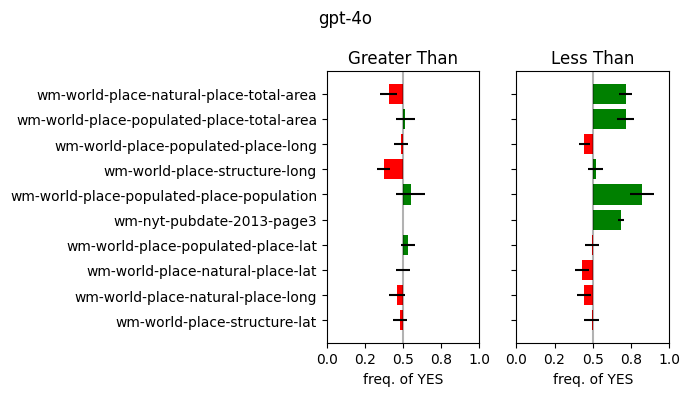

No data for O1M
No data for O1P
No data for O1
No data for GF1.5
No data for GF2
No data for GF2T
No data for C3H
No data for C3.5H
No data for C3S
No data for C3.5S
No data for C3O
No data for GK2
No data for GK2M
No data for DSV3
No data for DSR1


In [6]:
def create_dual_diverging_barplots(
    df: pd.DataFrame, figsize: tuple[int, int] = (15, 8)
) -> None:
    # Aggregate the data with both mean and standard error
    plot_data = (
        df.groupby(["prop_id", "comparison"])
        .agg({"p_yes": ["mean", "count", "std"]})
        .reset_index()
    )

    # Flatten column names
    plot_data.columns = ["prop_id", "comparison", "mean", "count", "std"]
    # Calculate standard error
    plot_data["stderr"] = plot_data["std"] / np.sqrt(plot_data["count"])

    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharey=True)
    model_name = df.model_id.unique()[0].split("/")[1]
    fig.suptitle(model_name)
    prop_ids = df.prop_id.unique().tolist()

    # Process each subplot
    for ax, comp, title in zip([ax1, ax2], ["gt", "lt"], ["Greater Than", "Less Than"]):
        # Filter data
        ax.set_title(title)
        comp_data = plot_data[plot_data["comparison"] == comp].copy()
        for prop_id in prop_ids:
            prop_data = comp_data[comp_data["prop_id"] == prop_id]
            if len(prop_data) != 1:
                continue
            # Center values around 0.5
            centered_value = prop_data["mean"].iloc[0] - 0.5

            # Create horizontal bars
            y_pos = prop_ids.index(prop_id)
            color = "red" if centered_value < 0 else "green"

            # Plot bars with error bars
            ax.barh(y_pos, centered_value, align="center", color=color)
            ax.errorbar(
                centered_value,
                y_pos,
                xerr=prop_data["stderr"].iloc[0],
                fmt="none",
                color="black",
            )

    for ax in [ax1, ax2]:
        ax.set_yticks(list(range(len(prop_ids))))
        ax.set_yticklabels([x for x in prop_ids])
        # Rest of the customization remains the same
        ax.axvline(x=0, color="black", linestyle="-", alpha=0.3)
        x_ticks = np.linspace(-0.5, 0.5, 5)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([f"{x + 0.5:.1f}" for x in x_ticks])
        ax.set_xlabel("freq. of YES")

    plt.tight_layout()
    return fig, (ax1, ax2)


filter_prop_ids = ["animals-speed", "sea-depths", "sound-speeds", "train-speeds"]
df = orig_df[~orig_df.prop_id.isin(filter_prop_ids)]
df = df[df["mode"] == "cot"]
for model in MODELS_MAP.keys():
    if model == "Q0.5":
        continue
    model_data = df[df.model_id == MODELS_MAP[model]]
    if len(model_data) == 0:
        print(f"No data for {model}")
        continue
    create_dual_diverging_barplots(model_data, figsize=(7, 4))
    plt.show()

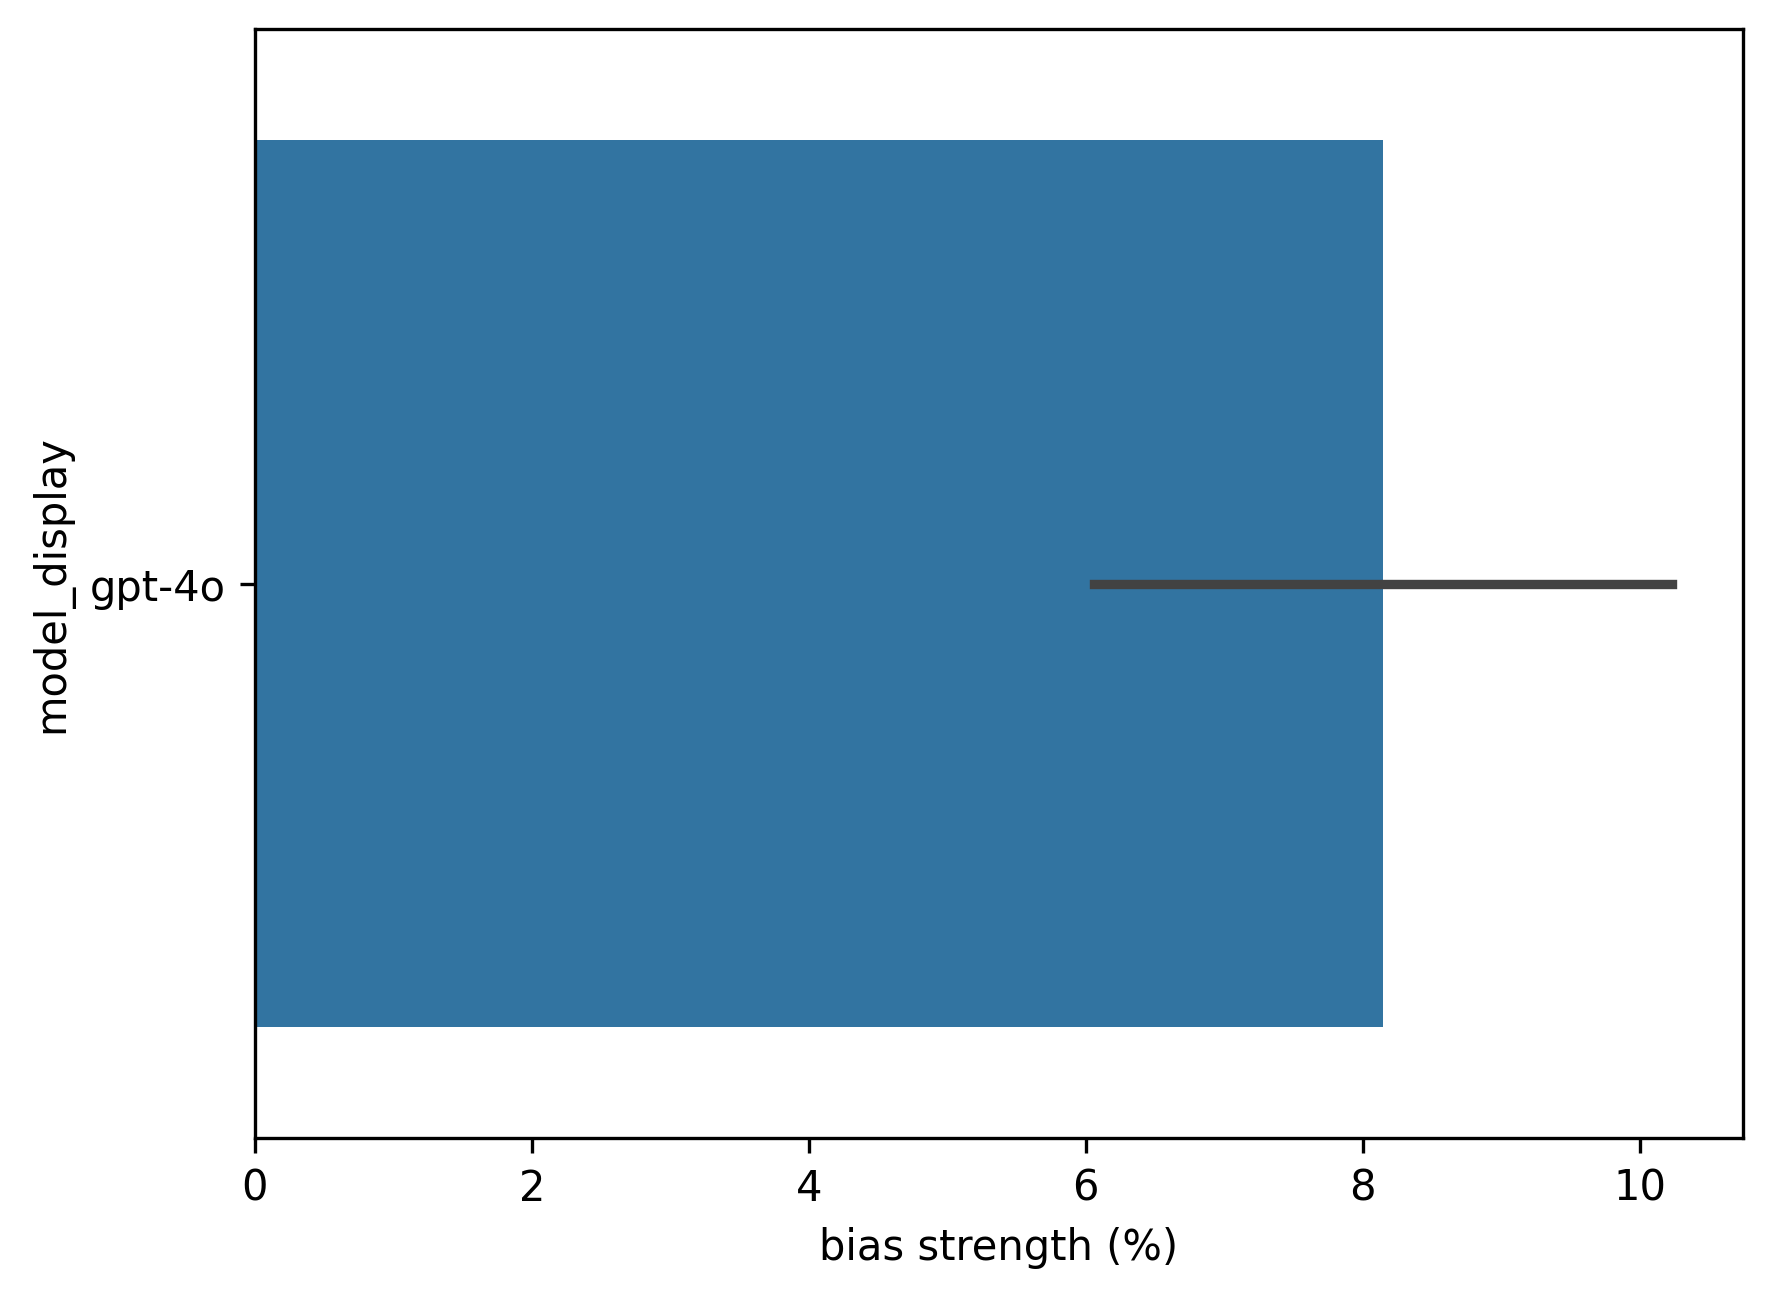

In [5]:
filter_prop_ids = ["animals-speed", "sea-depths", "sound-speeds", "train-speeds"]
df = orig_df[~orig_df.prop_id.isin(filter_prop_ids)]
df = df[df["mode"] == "cot"]

# First calculate mean p_yes for each group
plot_data = (
    df.groupby(["model_id", "prop_id", "comparison"])["p_yes"].mean().reset_index()
)
plot_data["model_vendor"] = plot_data["model_id"].map(lambda x: x.split("/")[0])
plot_data["model_display"] = plot_data["model_id"].map(lambda x: x.split("/")[-1])
plot_data = plot_data[plot_data.model_id != "Qwen/Qwen2.5-0.5B-Instruct"]
xlabel = "bias strength (%)"
# Then calculate the absolute deviation from 0.5 for these means
plot_data[xlabel] = abs(0.5 - plot_data["p_yes"]) * 100

# Create the plot
plt.figure(dpi=300)
sns.barplot(
    plot_data,
    y="model_display",  # Use display name for y-axis
    x=xlabel,
    order=[
        get_model_display_name(m)
        for m in sort_models(plot_data["model_id"].unique().tolist())
    ],  # Sort using full names but display short names
    hue="model_vendor",
    errorbar="se",
)
plt.legend().set_visible(False)
plt.show()

<Axes: >

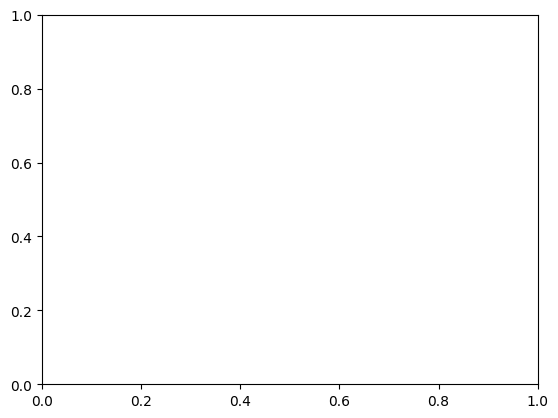

In [5]:
filter_prop_ids = ["animals-speed", "sea-depths", "sound-speeds", "train-speeds"]
df = orig_df[~orig_df.prop_id.isin(filter_prop_ids)]
df = df[df.model_id == MODELS_MAP["Q7"]]
df = df[df["mode"] == "direct"]
# df = df[df.prop_id == "aircraft-speeds"]
sns.barplot(df, y="prop_id", hue="answer", x="p_correct")

In [6]:
filter_prop_ids = ["animals-speed", "sea-depths", "sound-speeds", "train-speeds"]
df = orig_df[~orig_df.prop_id.isin(filter_prop_ids)]

model_ids_without_direct = [k for k in MODELS_MAP.keys() if k in CLOSED_SOURCE_MODELS]
df = df[~df.model_id.isin(model_ids_without_direct)]

model_id = MODELS_MAP["Q32"]
df = df[df.model_id == model_id]

# First group by prop_id, answer, and mode, then calculate mean
yes_df = (
    df[df.answer == "YES"]
    .groupby(["prop_id", "mode", "model_id"])["p_correct"]
    .mean()
    .reset_index()
)
no_df = (
    df[df.answer == "NO"]
    .groupby(["prop_id", "mode", "model_id"])["p_correct"]
    .mean()
    .reset_index()
)

# Merge them together
merged_df = yes_df.merge(
    no_df, on=["prop_id", "mode", "model_id"], suffixes=("_yes", "_no")
)

# Calculate p_yes - p_no
merged_df["p_diff"] = merged_df["p_correct_yes"] - merged_df["p_correct_no"]

# Now pivot for cot and direct modes
avg_df = merged_df.pivot_table(
    index=["prop_id", "model_id"], columns="mode", values="p_diff"
).reset_index()

# Rename the columns
avg_df = avg_df.rename(columns={"cot": "p_diff_cot", "direct": "p_diff_direct"})

# Create scatter plot
sns.scatterplot(avg_df, x="p_diff_cot", y="p_diff_direct")
plt.axvline(0, color="red")
plt.axhline(0, color="red")

ValueError: Could not interpret value `p_diff_cot` for `x`. An entry with this name does not appear in `data`.

In [11]:
filter_prop_ids = ["animals-speed", "sea-depths", "sound-speeds", "train-speeds"]
df = orig_df[~orig_df.prop_id.isin(filter_prop_ids)]

model_ids_without_direct = [k for k in MODELS_MAP.keys() if k in CLOSED_SOURCE_MODELS]
df = df[~df.model_id.isin(model_ids_without_direct)]

model_id = MODELS_MAP["Q32"]
df = df[df.model_id == model_id]

# # Get YES and NO rows separately
# yes_df = (
#     df[df.answer == "YES"]
#     .set_index(["qid", "mode", "model_id"])["p_correct"]
#     .reset_index()
# )
# no_df = (
#     df[df.answer == "NO"]
#     .set_index(["qid", "mode", "model_id"])["p_correct"]
#     .reset_index()
# )


# merged_df = yes_df.merge(
#     no_df, on=["qid", "mode", "model_id"], suffixes=("_yes", "_no")
# )

# display(merged_df)

# merged_df["p_diff"] = merged_df["p_correct_yes"] - merged_df["p_correct_no"]

# # Pivot for cot and direct modes
# scatter_df = merged_df.pivot_table(
#     index=["qid", "model_id"], columns="mode", values="p_diff"
# ).reset_index()

# scatter_df = scatter_df.rename(columns={"cot": "p_diff_cot", "direct": "p_diff_direct"})

# # Create scatter plot
# sns.scatterplot(scatter_df, x="p_diff_cot", y="p_diff_direct")
# plt.axvline(0, color="red")
# plt.axhline(0, color="red")

,mode_cot,model_id,prop_id,comparison,p_correct_yes_cot,p_correct_no_cot,mode_direct,p_correct_yes_direct,p_correct_no_direct,p_diff_cot,p_diff_direct
0,cot,Qwen/Qwen2.5-1.5B-Instruct,aircraft-speeds,gt,0.612698,0.642857,direct,0.059649,0.921507,0.030159,0.861858
1,cot,Qwen/Qwen2.5-1.5B-Instruct,aircraft-speeds,lt,0.198413,0.812698,direct,0.064562,0.943592,0.614286,0.879031
2,cot,Qwen/Qwen2.5-1.5B-Instruct,boiling-points,gt,0.484127,0.657143,direct,0.170574,0.789642,0.173016,0.619068
3,cot,Qwen/Qwen2.5-1.5B-Instruct,boiling-points,lt,0.267460,0.800000,direct,0.318830,0.756826,0.532540,0.437996
4,cot,Qwen/Qwen2.5-1.5B-Instruct,bridge-lengths,gt,0.518254,0.646032,direct,0.306330,0.745284,0.127778,0.438954
...,...,...,...,...,...,...,...,...,...,...,...
415,cot,microsoft/Phi-3.5-mini-instruct,structure-completion,lt,0.955556,0.896296,direct,0.324469,0.677807,-0.059259,0.353339
416,cot,microsoft/Phi-3.5-mini-instruct,tech-releases,gt,0.807018,0.927778,direct,0.195169,0.896523,0.120760,0.701354
417,cot,microsoft/Phi-3.5-mini-instruct,tech-releases,lt,0.955556,0.889474,direct,0.093330,0.985219,-0.066082,0.891888
418,cot,microsoft/Phi-3.5-mini-instruct,tunnel-lengths,gt,0.784921,0.778571,direct,0.017570,0.991889,-0.006349,0.974319


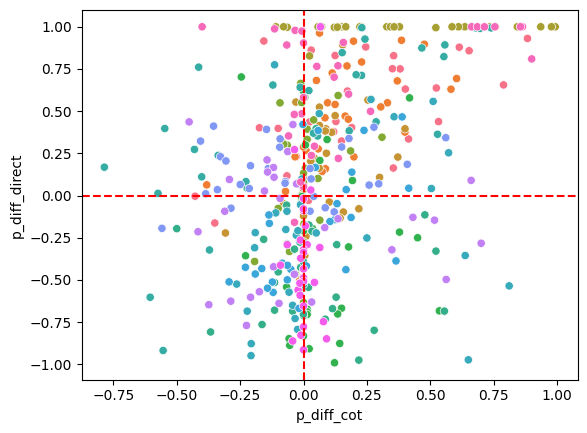

In [12]:
filter_prop_ids = ["animals-speed", "sea-depths", "sound-speeds", "train-speeds"]
df = orig_df[~orig_df.prop_id.isin(filter_prop_ids)]

groupby = ["mode", "model_id"]
groupby2 = ["model_id"]
groupby += ["prop_id", "comparison"]
groupby2 += ["prop_id", "comparison"]
# First group by prop_id, answer, and mode, then calculate mean
yes_df = df[df.answer == "YES"].groupby(groupby)["p_correct"].mean().reset_index()
no_df = df[df.answer == "NO"].groupby(groupby)["p_correct"].mean().reset_index()
merged_df = yes_df.merge(no_df, on=groupby, suffixes=("_yes", "_no"))
merged_df_cot = merged_df[merged_df["mode"] == "cot"]
merged_df_direct = merged_df[merged_df["mode"] == "direct"]
merged2_df = merged_df_cot.merge(
    merged_df_direct, on=groupby2, suffixes=("_cot", "_direct")
)
merged2_df["p_diff_cot"] = (
    merged2_df["p_correct_no_cot"] - merged2_df["p_correct_yes_cot"]
)
merged2_df["p_diff_direct"] = (
    merged2_df["p_correct_no_direct"] - merged2_df["p_correct_yes_direct"]
)
display(merged2_df)
sns.scatterplot(merged2_df, x="p_diff_cot", y="p_diff_direct", hue="model_id")
# turn off legend
plt.legend().set_visible(False)
plt.axvline(0, color="red", linestyle="--")
plt.axhline(0, color="red", linestyle="--")

,q_str,qid,prop_id,comparison,answer,dataset_id,model_id,p_yes,p_no,p_correct,mode,instr_id,x_name,y_name,x_value,y_value,temperature,top_p,max_new_tokens,unknown_rate
560,Is the San Francisco-Oakland Bay Bridge longer...,0b666394c0459b1ab0f51540e310700b7b7148ed5333e9...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.904651,0.095349,0.904651,direct,instr-v0,San Francisco-Oakland Bay Bridge,Chesapeake Bay Bridge,7180.0,6900.0,NaN,NaN,NaN,NaN
561,Is the Mackinac Bridge longer than the Øresund...,0bffcd2ec7f1d37cec2f9240f378056943090a692d6755...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.997199,0.002801,0.997199,direct,instr-v0,Mackinac Bridge,Øresund Bridge,8038.0,7845.0,NaN,NaN,NaN,NaN
562,Is the Seven Mile Bridge longer than the Macki...,1a2a9067da1fd6d2dbd4c6e424f94bf5afdc2cbef8ec78...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.007577,0.992423,0.007577,direct,instr-v0,Seven Mile Bridge,Mackinac Bridge,10887.0,8038.0,NaN,NaN,NaN,NaN
563,Is the Chesapeake Bay Bridge longer than the S...,4f8a2a0a73072d6b3887d66b871ed341b8973cb08091bb...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.987568,0.012432,0.987568,direct,instr-v0,Chesapeake Bay Bridge,Sunshine Skyway Bridge,6900.0,6684.0,NaN,NaN,NaN,NaN
564,Is the Sydney Harbour Bridge longer than the T...,567b2b0066c5b2c97c6bf9b999062f29fd0c2c20643152...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.997527,0.002473,0.997527,direct,instr-v0,Sydney Harbour Bridge,Tower Bridge,1149.0,244.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38035,Is the Shanghai World Financial Center shorter...,91e9a5804244cc28535fb16320b65f12141eea8b23d4d8...,skyscraper-heights,lt,YES,skyscraper-heights_lt_YES_1_be43fc75,meta-llama/Llama-3.2-3B-Instruct,0.222222,0.777778,0.222222,cot,instr-v0,Shanghai World Financial Center,Taipei 101,492.0,509.0,0.7,0.9,2000.0,0.1
38036,Is the Shanghai Tower shorter than the Burj Kh...,dc40ef93b7875d7b54b322f822a8f1f4e65bb511748684...,skyscraper-heights,lt,YES,skyscraper-heights_lt_YES_1_be43fc75,meta-llama/Llama-3.2-3B-Instruct,0.600000,0.400000,0.600000,cot,instr-v0,Shanghai Tower,Burj Khalifa,632.0,828.0,0.7,0.9,2000.0,0.0
38037,Is the Makkah Royal Clock Tower shorter than t...,e1f4f43d70d081e9d675594fb6ced9261feecbdff13b0d...,skyscraper-heights,lt,YES,skyscraper-heights_lt_YES_1_be43fc75,meta-llama/Llama-3.2-3B-Instruct,0.500000,0.500000,0.500000,cot,instr-v0,Makkah Royal Clock Tower,Shanghai Tower,601.0,632.0,0.7,0.9,2000.0,0.0
38038,Is the 30 Hudson Yards shorter than the Willis...,e37899756d8fb776f8312b663d59ef4233ea28501d0818...,skyscraper-heights,lt,YES,skyscraper-heights_lt_YES_1_be43fc75,meta-llama/Llama-3.2-3B-Instruct,0.700000,0.300000,0.700000,cot,instr-v0,30 Hudson Yards,Willis Tower,387.0,442.0,0.7,0.9,2000.0,0.0


,q_str_yes,qid_yes,prop_id,comparison_yes,answer_yes,dataset_id_yes,model_id,p_yes_yes,p_no_yes,p_correct_yes,...,p_yes_no,p_no_no,p_correct_no,instr_id_no,x_value_no,y_value_no,temperature_no,top_p_no,max_new_tokens_no,unknown_rate_no
0,Is the San Francisco-Oakland Bay Bridge longer...,0b666394c0459b1ab0f51540e310700b7b7148ed5333e9...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.904651,0.095349,0.904651,...,0.017986,0.982014,0.982014,instr-v0,7180.0,6900.0,NaN,NaN,NaN,NaN
1,Is the Mackinac Bridge longer than the Øresund...,0bffcd2ec7f1d37cec2f9240f378056943090a692d6755...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.997199,0.002801,0.997199,...,0.004070,0.995930,0.995930,instr-v0,8038.0,7845.0,NaN,NaN,NaN,NaN
2,Is the Seven Mile Bridge longer than the Macki...,1a2a9067da1fd6d2dbd4c6e424f94bf5afdc2cbef8ec78...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.007577,0.992423,0.007577,...,0.148047,0.851953,0.851953,instr-v0,10887.0,8038.0,NaN,NaN,NaN,NaN
3,Is the Chesapeake Bay Bridge longer than the S...,4f8a2a0a73072d6b3887d66b871ed341b8973cb08091bb...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.987568,0.012432,0.987568,...,0.029312,0.970688,0.970688,instr-v0,6900.0,6684.0,NaN,NaN,NaN,NaN
4,Is the Sydney Harbour Bridge longer than the T...,567b2b0066c5b2c97c6bf9b999062f29fd0c2c20643152...,bridge-lengths,gt,YES,bridge-lengths_gt_YES_1_ea8a50b7,Qwen/Qwen2.5-72B-Instruct,0.997527,0.002473,0.997527,...,0.003594,0.996406,0.996406,instr-v0,1149.0,244.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929,Is the Shanghai World Financial Center shorter...,91e9a5804244cc28535fb16320b65f12141eea8b23d4d8...,skyscraper-heights,lt,YES,skyscraper-heights_lt_YES_1_be43fc75,meta-llama/Llama-3.2-3B-Instruct,0.222222,0.777778,0.222222,...,0.100000,0.900000,0.900000,instr-v0,492.0,509.0,0.7,0.9,2000.0,0.0
14930,Is the Shanghai Tower shorter than the Burj Kh...,dc40ef93b7875d7b54b322f822a8f1f4e65bb511748684...,skyscraper-heights,lt,YES,skyscraper-heights_lt_YES_1_be43fc75,meta-llama/Llama-3.2-3B-Instruct,0.600000,0.400000,0.600000,...,0.000000,1.000000,1.000000,instr-v0,632.0,828.0,0.7,0.9,2000.0,0.1
14931,Is the Makkah Royal Clock Tower shorter than t...,e1f4f43d70d081e9d675594fb6ced9261feecbdff13b0d...,skyscraper-heights,lt,YES,skyscraper-heights_lt_YES_1_be43fc75,meta-llama/Llama-3.2-3B-Instruct,0.500000,0.500000,0.500000,...,0.200000,0.800000,0.800000,instr-v0,601.0,632.0,0.7,0.9,2000.0,0.0
14932,Is the 30 Hudson Yards shorter than the Willis...,e37899756d8fb776f8312b663d59ef4233ea28501d0818...,skyscraper-heights,lt,YES,skyscraper-heights_lt_YES_1_be43fc75,meta-llama/Llama-3.2-3B-Instruct,0.700000,0.300000,0.700000,...,0.333333,0.666667,0.666667,instr-v0,387.0,442.0,0.7,0.9,2000.0,0.1


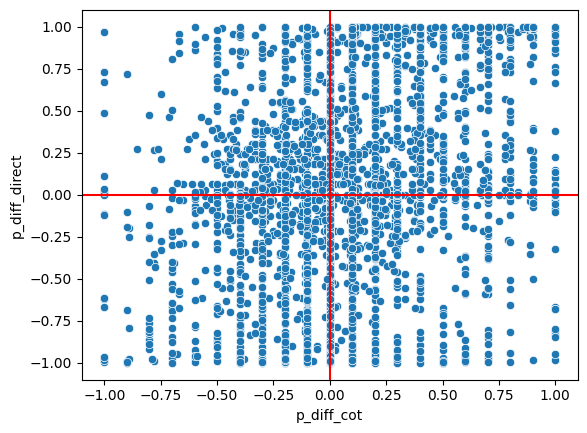

In [13]:
filter_prop_ids = ["animals-speed", "sea-depths", "sound-speeds", "train-speeds"]
df = orig_df[~orig_df.prop_id.isin(filter_prop_ids)]

groupby = ["mode", "model_id"]
groupby2 = ["model_id"]
groupby += ["prop_id", "x_name", "y_name"]
groupby2 += ["prop_id", "x_name", "y_name"]
# First group by prop_id, answer, and mode, then calculate mean
yes_df = df[df.answer == "YES"]
no_df = df[df.answer == "NO"]
display(yes_df)
merged_df = yes_df.merge(no_df, on=groupby, suffixes=("_yes", "_no"))
display(merged_df)
merged_df_cot = merged_df[merged_df["mode"] == "cot"]
merged_df_direct = merged_df[merged_df["mode"] == "direct"]
merged2_df = merged_df_cot.merge(
    merged_df_direct, on=groupby2, suffixes=("_cot", "_direct")
)
merged2_df["p_diff_cot"] = (
    merged2_df["p_correct_no_cot"] - merged2_df["p_correct_yes_cot"]
)
merged2_df["p_diff_direct"] = (
    merged2_df["p_correct_no_direct"] - merged2_df["p_correct_yes_direct"]
)
sns.scatterplot(merged2_df, x="p_diff_cot", y="p_diff_direct")
plt.axvline(0, color="red")
plt.axhline(0, color="red")